In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#% matplotlip inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORT & LOAD DATASET

In [2]:
df=pd.read_csv("trainloan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

DATA CLEANING

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [8]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dropna(inplace=True)    #drops all the missing values

In [11]:
df.isnull().sum() ## No missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.shape

(542, 13)

EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

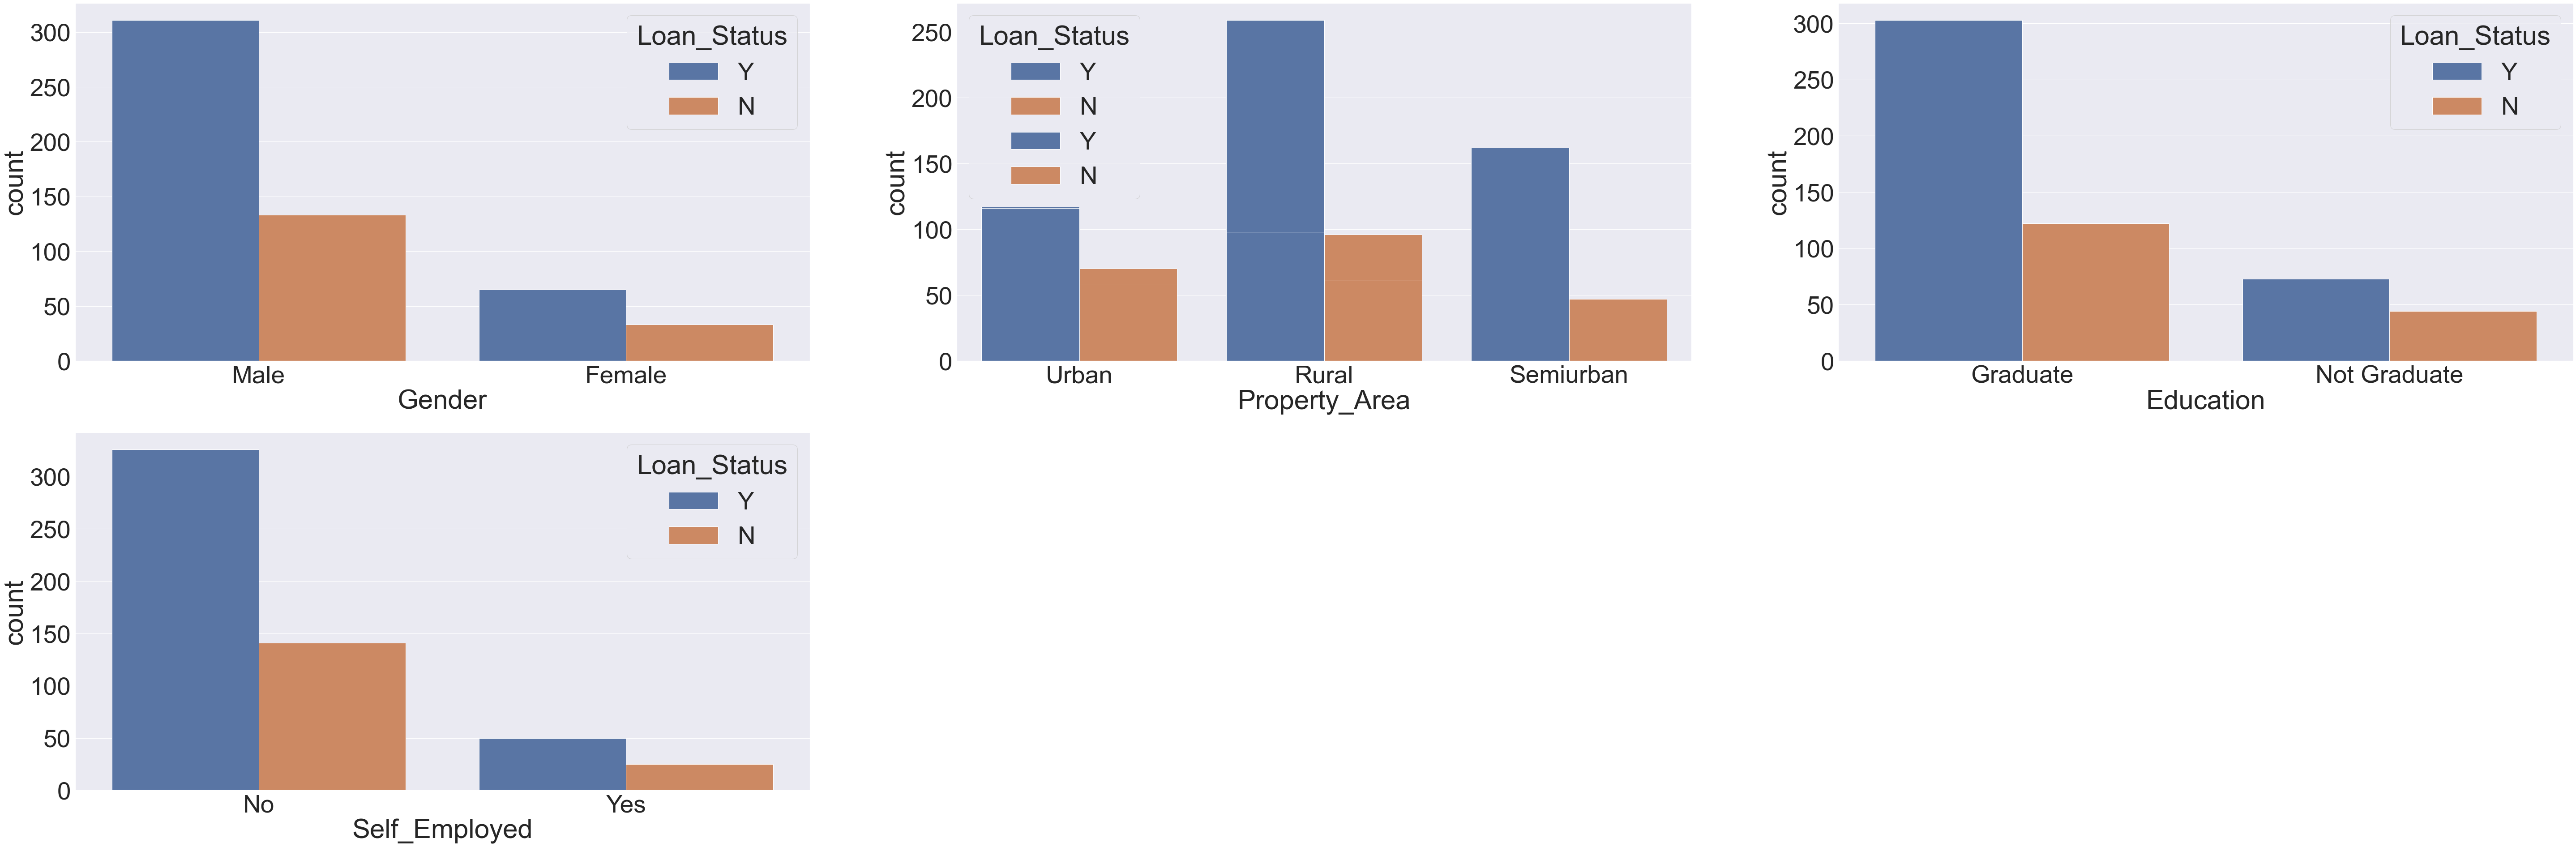

In [13]:
#comparison between parameters and getting the loan
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(df["Gender"],hue=df["Loan_Status"])

plt.subplot(332)
sns.countplot(df["Married"],hue=df["Loan_Status"])

plt.subplot(333)
sns.countplot(df["Education"],hue=df["Loan_Status"])

plt.subplot(334)
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])

plt.subplot(332)
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])

REPLACING THE VARIABLES TO NUMERICAL FORM & DISPLAY VALUE COUNTS

Data in numerical form avoids disturbances in building the model


In [14]:
df["Loan_Status"].replace('Y',1,inplace= True)
df["Loan_Status"].replace('N',0,inplace= True)
df["Loan_Status"].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [15]:
df.Gender=df.Gender.map({"Male":1,"Female":0})
df["Gender"].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [16]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [17]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df["Dependents"].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [18]:
df.Education=df.Education.map({"Graduate":1,"Not Graduate":0})
df["Education"].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [19]:
df.Self_Employed=df.Self_Employed.map({"Yes":1,"No":0})
df["Self_Employed"].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [20]:
df.Property_Area=df.Property_Area.map({"Urban":2,"Rural":0,"Semiurban":1})
df["Property_Area"].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [21]:

df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
250.000000     1
62.000000      1
85.000000      1
214.000000     1
436.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [22]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
df['Credit_History'].value_counts()

1.000000    425
0.000000     74
0.842199     43
Name: Credit_History, dtype: int64

In [24]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.000000,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.000000,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.000000,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.000000,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.000000,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.000000,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.000000,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.000000,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.000000,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.000000,1,0


In [25]:
#importing packages for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [26]:
#splitting to train and test
X=df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

LOGISTIC REGRESSION

It is a supervised learning classification algorithim used to predict the probability of a target variable.
Mathematically, a logistic regression model predicts p(y=1) as a function of X. It is one of the simplest Ml algorithims that can be used for various classificatiob problems such as spam detection,cancer detection,diabetes detection  etc.

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)
lr_prediction=model.predict(X_test)
print('Logistic Regression accuracy=',metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy= 0.7852760736196319


In [37]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_test [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]
